In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree, metrics
from matplotlib.ticker import MaxNLocator
import seaborn as sns

In [4]:
fuji = pd.read_csv("fuji_full_fp_sample.csv")
fuji = fuji.sample(frac=1).reset_index(drop=True)
fuji

,ra_1,dec_1,targetid_1,id,healpix,survey,program,targetid.1,z_1,zerr,...,circ_radius,pos_angle,tmass,flag,z_2,rmag,g_r_PS1_5_cor,W2_W3,W2_W3_err,PS1_ibumpy
0,217.502600,-0.423927,39627776298319962,3372,25956,sv3,bright,39627776298319962,0.135313,0.000004,...,3.590161,5.206202,2MASSJ14300062-0025259,0,0.1353,17.293,0.624,3.627,0.107,0.274
1,151.360019,2.654791,39627853704202540,3276,27257,sv3,bright,39627853704202540,0.097422,0.000037,...,2.376711,-9.414450,2MASSJ10052642+0239171,1,0.0974,17.032,0.655,2.436,-9.999,0.088
2,182.799845,55.493936,39633328818619707,2687,11180,sv2,bright,39633328818619707,0.093323,0.000012,...,3.736264,10.410058,2MASXJ12111203+5529384,1,0.0933,15.235,0.775,0.587,-9.999,0.065
3,184.349227,0.919071,39627811979265877,3474,26279,sv3,bright,39627811979265877,0.120947,0.000025,...,0.871863,-63.032223,2MASSJ12172379+0055096,1,0.1210,17.778,0.797,3.067,-9.999,0.043
4,107.028217,55.437684,39633328093007230,896,7022,sv1,bright,39633328093007230,0.111449,0.000007,...,1.057430,-54.459007,2MASSJ07080676+5526156,1,0.1114,16.833,0.735,1.748,-9.999,0.048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6693,244.011073,54.792625,39633319008142712,3442,10156,sv3,bright,39633319008142712,0.084561,0.000028,...,1.536539,65.694590,2MASXJ16160269+5447335,1,0.0846,16.966,0.782,-9.999,-9.999,0.081
6694,237.860902,43.776960,39633145246518309,3332,9924,sv3,bright,39633145246518309,0.039946,0.000007,...,2.743919,4.097952,2MASXJ15512663+4346375,1,0.0400,14.853,0.786,1.249,0.086,0.117
6695,208.292365,4.993865,39627908930605749,3188,26432,sv3,bright,39627908930605749,0.079132,0.000028,...,4.116712,-65.938730,2MASXJ13531018+0459376,0,0.0791,16.187,0.722,1.145,0.468,0.221
6696,218.144929,2.030844,39627836704689175,3381,25976,sv3,bright,39627836704689175,0.111539,0.000019,...,1.402337,-9.072643,2MASSJ14323478+0201510,1,0.1114,17.318,0.795,1.763,-9.999,0.024


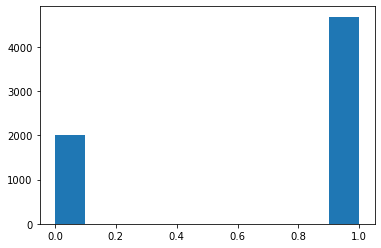

In [5]:
plt.hist(fuji.flag)
plt.show()

In [6]:
print (len(fuji))

6698


In [7]:
fuji_train = fuji.head(4000)
fuji_test = fuji.tail(2698)

In [8]:
fuji.keys()

Index(['ra_1', 'dec_1', 'targetid_1', 'id', 'healpix', 'survey', 'program',
       'targetid.1', 'z_1', 'zerr', 'zwarn', 'spectype', 'subtype',
       'deltachi2', 'healpix_id', 'obsconditions', 'release', 'brickid_1',
       'brick_objid', 'sersic_1', 'coadd_numexp', 'coadd_exptime',
       'coadd_numnight', 'coadd_numtile', 'healpix_id.1', 'objid_1',
       'brickid.1', 'brickname_1', 'ppxf_sigma', 'ppxf_sigma_error', 'DER_SNR',
       'snr_ppxf', 'TYPE', 'SERSIC_2', 'Z_PHOT_MEDIAN', 'Z_PHOT_L95', 'mag_g',
       'mag_r', 'mag_z', 'mag_B', 'mag_g_err', 'mag_r_err', 'mag_z_err',
       'fibre_mag_g', 'fibre_mag_r', 'fibre_mag_z', 'uncor_radius',
       'uncor_radius_err', 'BA_ratio', 'BA_ratio_error', 'circ_radius',
       'pos_angle', 'tmass', 'flag', 'z_2', 'rmag', 'g_r_PS1_5_cor', 'W2_W3',
       'W2_W3_err', 'PS1_ibumpy'],
      dtype='object')

In [19]:
cols = ['sersic_1','mag_g','mag_r','mag_z','uncor_radius','BA_ratio','pos_angle','g_r_PS1_5_cor','W2_W3']
cols

['sersic_1',
 'mag_g',
 'mag_r',
 'mag_z',
 'uncor_radius',
 'BA_ratio',
 'pos_angle',
 'g_r_PS1_5_cor',
 'W2_W3']

In [20]:
clf = tree.DecisionTreeClassifier(max_depth=٥)

In [21]:
clf.fit(fuji_train[cols],fuji_train.flag)

DecisionTreeClassifier(max_depth=7)

In [22]:
train_predictions = clf.predict(fuji_train[cols])

In [23]:
test_predictions = clf.predict(fuji_test[cols])

In [24]:
train_accuracy = metrics.accuracy_score(fuji_train.flag, train_predictions)
train_accuracy

0.9005

In [25]:
test_accuracy = metrics.accuracy_score(fuji_test.flag, test_predictions)
test_accuracy

0.832468495181616

In [26]:
train_accuracies = []; test_accuracies= []; depth = []
for i in range(24):
    clf = tree.DecisionTreeClassifier(max_depth=i+1)
    clf.fit(fuji_train[cols],fuji_train.flag)
    train_predictions = clf.predict(fuji_train[cols])
    test_predictions = clf.predict(fuji_test[cols])
    train_accuracy = metrics.accuracy_score(fuji_train.flag, train_predictions)
    train_accuracies.append(train_accuracy)
    test_accuracy = metrics.accuracy_score(fuji_test.flag, test_predictions)
    test_accuracies.append(test_accuracy)
    depth.append(i+1)

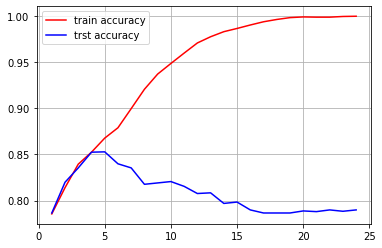

In [27]:
plt.plot(depth,train_accuracies, color="red",label="train accuracy")
plt.plot(depth,test_accuracies, color="blue",label="trst accuracy")
plt.grid()
plt.legend()
plt.show()